# Linear regression after reading multiple coulumn data from Excel sheet

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [89]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
print(df)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

# .

In [69]:
#df = df.loc[ 0:3000 , ('total_rooms', 'population' , 'median_house_value') ]
#df

KeyError: ignored

In [ ]:
room = df.loc[0:50 , 'total_rooms']
pop = df.loc[50:100 , 'population']
income_room = df.loc[0:50 , 'median_house_value']
income_pop = df.loc[50:100 , 'median_house_value']
room = room.to_numpy()
pop = pop.to_numpy()
income_room = income_room.to_numpy()
income_pop = income_pop.to_numpy()


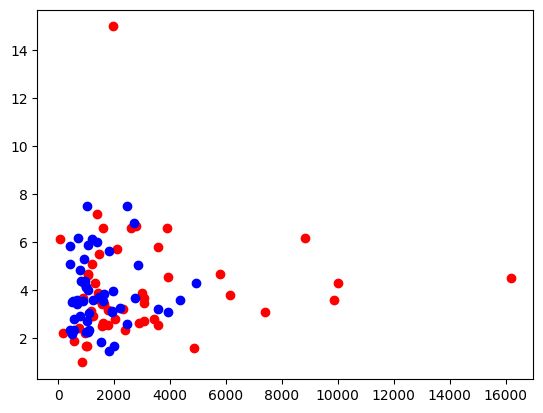

In [ ]:
room = room.reshape((-1,1))
pop = pop.reshape((-1,1))
plt.scatter(room , income_room , color = 'red')
plt.scatter ( pop ,income_pop , color = 'blue')
#plt.scatter ( income ,income , color = 'grey')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(room, income_room)
slr.fit(pop , income_pop)

LinearRegression()

In [ ]:
pred_room = slr.predict(room)
pred_pop = slr.predict(pop)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_r = mean_squared_error(income_room , pred_room)
mse_p = mean_squared_error(income_pop , pred_pop)

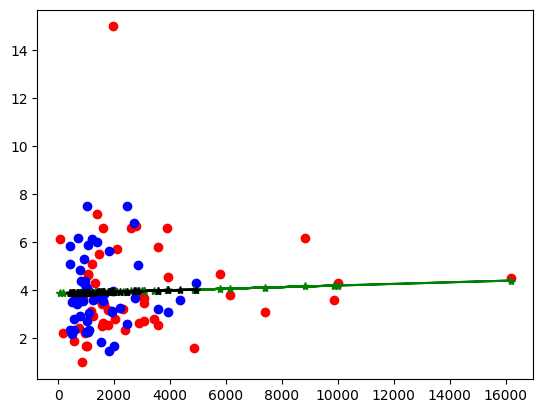

In [ ]:
plt.scatter(room , income_room , color = 'red')
plt.scatter ( pop ,income_pop , color = 'blue')
plt.plot (room , pred_room, color = 'green', marker= '*')
plt.plot (pop , pred_pop , color= 'black', marker = '*')
plt.show()

# ----

In [90]:
df = df.loc[ 0:17000 , ('total_rooms', 'housing_median_age' , 'median_house_value') ]
df

,total_rooms,housing_median_age,median_house_value
0,3885.0,27.0,344700.0
1,1510.0,43.0,176500.0
2,3589.0,27.0,270500.0
3,67.0,28.0,330000.0
4,1241.0,19.0,81700.0
...,...,...,...
2995,1450.0,23.0,225000.0
2996,5257.0,27.0,237200.0
2997,956.0,10.0,62000.0
2998,96.0,40.0,162500.0


In [102]:
x = df.loc[0:3000, ('total_rooms', 'housing_median_age')]
x1 = x.loc[0:3000 , ('total_rooms')]
x1 = x1.to_numpy()
x1 = x1.reshape(-1,1)

x2 = x.loc[0:3000 , ('housing_median_age')]
x2 = x2.to_numpy()
x2 = x2.reshape(-1,1)

y= df.loc[0:3000 , ('median_house_value')]
y1= y.to_numpy()
y1 = y1.reshape(-1,1)
print(x)

      total_rooms  housing_median_age
0          3885.0                27.0
1          1510.0                43.0
2          3589.0                27.0
3            67.0                28.0
4          1241.0                19.0
...           ...                 ...
2995       1450.0                23.0
2996       5257.0                27.0
2997        956.0                10.0
2998         96.0                40.0
2999       1765.0                42.0

[3000 rows x 2 columns]


In [99]:
print(y)

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64


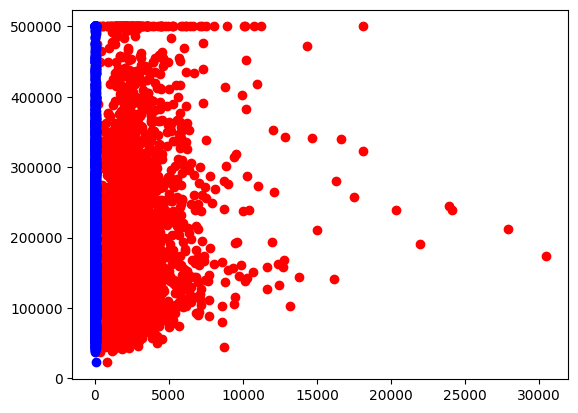

In [104]:
plt.scatter (x1,y, color= 'red')
plt.scatter(x2, y1 ,color = 'blue')

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [75]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [76]:
lr.fit(x_train, y_train)

LinearRegression()

In [77]:
c = lr.intercept_
c

201435.6601199237

In [78]:
m = lr.coef_
m

array([ 25.62966573, -45.46950633])

In [80]:
pred = lr.predict (x_train)
pred

array([181709.99474779, 188239.38508942, 207798.89374259, ...,
       210325.3432678 , 212042.8624561 , 196863.45843728])

Text(0, 0.5, 'Predicted income')

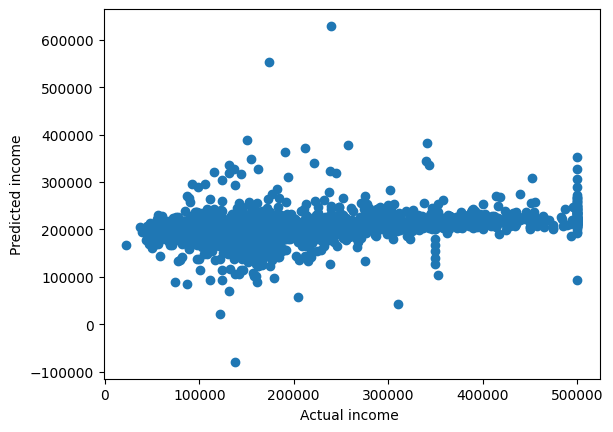

In [87]:
plt.scatter (y_train, pred)
plt.xlabel("Actual income ")
plt.ylabel ("Predicted income")

In [82]:
from sklearn.metrics import r2_score
r2_score(y_train, pred)

0.07960570164235359

In [83]:
pred_test = lr.predict(x_test)

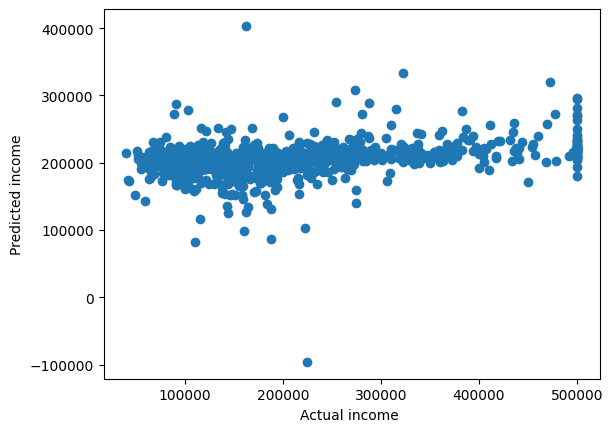

In [84]:
plt.scatter (y_test, pred_test)
plt.xlabel("Actual income ")
plt.ylabel ("Predicted income")
plt.show()

In [85]:
r2_score(y_test, pred_test)

0.10076524286521726

# insurance

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
data = pd.read_csv('/content/insurance.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat